### <u> Spotify vs Inflation rates </u>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
ons_and_spotify_df = pd.read_csv("..\data\ons_genre_including_genregroup_new.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\becca\AppData\Local\Temp\ipykernel_5192\4252731572.py:1: SyntaxWarning: invalid escape sequence '\d'
  ons_and_spotify_df = pd.read_csv("..\data\ons_genre_including_genregroup_new.csv")


In [3]:
ons_and_spotify_df

,year_quarter,genre,Genre_Group,streams,gdp_(£m),inflation_(%),hfce_(£m),unemployment_rate_(%)
0,2016 Q4,R&B,R&B,2414608.0,589476.0,1.5,369850.0,4.7
1,2016 Q4,Pop,Pop,2406621.0,589476.0,1.5,369850.0,4.7
2,2016 Q4,Pop,Pop,2345002.0,589476.0,1.5,369850.0,4.7
3,2016 Q4,Rock,Rock/Punk/Metal,1879767.0,589476.0,1.5,369850.0,4.7
4,2016 Q4,R&B,R&B,1797034.0,589476.0,1.5,369850.0,4.7
...,...,...,...,...,...,...,...,...
9834,2022 Q1,Pop,Pop,336351.0,629149.0,5.5,377996.0,3.8
9835,2022 Q1,Pop,Pop,335925.0,629149.0,5.5,377996.0,3.8
9836,2022 Q1,Hip-Hop,Rap/Hip-Hop,334594.0,629149.0,5.5,377996.0,3.8
9837,2022 Q1,House,Dance/House,333649.0,629149.0,5.5,377996.0,3.8


In [4]:
ons_and_spotify_df = ons_and_spotify_df.rename(columns={'Genre_Group': 'genre_group'})
ons_and_spotify_df= ons_and_spotify_df[['year_quarter', 'genre_group', 'streams', 'inflation_(%)']]
ons_and_spotify_df

,year_quarter,genre_group,streams,inflation_(%)
0,2016 Q4,R&B,2414608.0,1.5
1,2016 Q4,Pop,2406621.0,1.5
2,2016 Q4,Pop,2345002.0,1.5
3,2016 Q4,Rock/Punk/Metal,1879767.0,1.5
4,2016 Q4,R&B,1797034.0,1.5
...,...,...,...,...
9834,2022 Q1,Pop,336351.0,5.5
9835,2022 Q1,Pop,335925.0,5.5
9836,2022 Q1,Rap/Hip-Hop,334594.0,5.5
9837,2022 Q1,Dance/House,333649.0,5.5


In [5]:
agg_df = ons_and_spotify_df.groupby(['year_quarter', 'genre_group'], as_index=False).agg({
    'streams': 'sum',
    'inflation_(%)': 'mean'
})
agg_df.head(15)


,year_quarter,genre_group,streams,inflation_(%)
0,2016 Q4,Christmas,19182659.0,1.5
1,2016 Q4,Dance/House,10253538.0,1.5
2,2016 Q4,Disco,1033984.0,1.5
3,2016 Q4,Electronic,7981704.0,1.5
4,2016 Q4,Folk,281777.0,1.5
5,2016 Q4,Funk,378045.0,1.5
6,2016 Q4,Indie,2025699.0,1.5
7,2016 Q4,Jazz,1887543.0,1.5
8,2016 Q4,Musicals,460403.0,1.5
9,2016 Q4,Pop,38075668.0,1.5


In [6]:
agg_df = agg_df[agg_df['genre_group'] != 'Unknown']

In [7]:
print(agg_df['streams'].max())
print(agg_df['streams'].min())

776097326.0
264099.0


#### <u> Scatter Plot: </u>

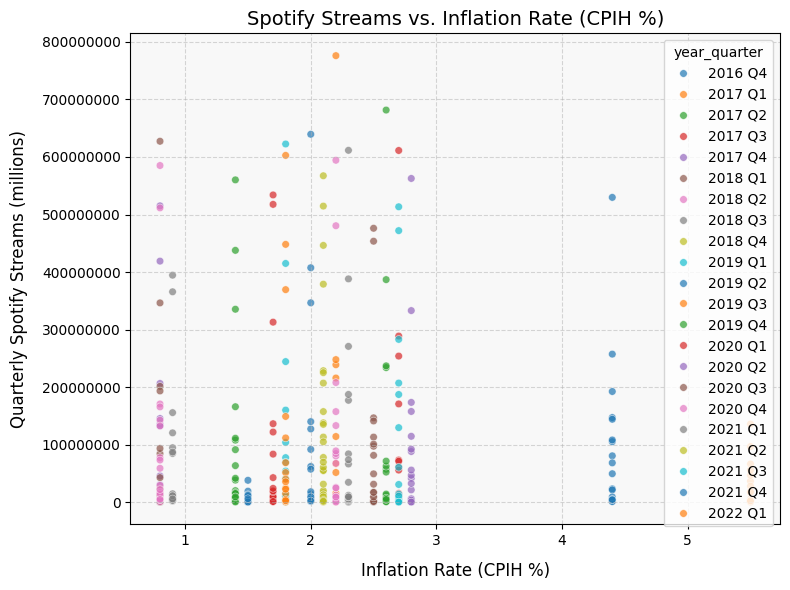

In [8]:
plt.figure(figsize=(8, 6)) 

sns.scatterplot(
    data= agg_df,
    x='inflation_(%)',
    y='streams',
    hue='year_quarter',
    palette='tab10',
    s=30,  
    alpha=0.7
)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))


plt.xlabel('Inflation Rate (CPIH %)', fontsize=12, labelpad=10)
plt.ylabel('Quarterly Spotify Streams (millions)', fontsize=12, labelpad=10)
plt.title(
    'Spotify Streams vs. Inflation Rate (CPIH %)',
    fontsize=14,
)

plt.grid(True, linestyle='--', alpha=0.5)

ax.set_facecolor('#f8f8f8')

plt.tight_layout()
plt.show()

#### Analysis of Scatter Plot:

##### There is no clear, strong correlation between the inflation rate (CPIH %) and quarterly Spotify streams - the data points are widely scattered across all inflation rates.
##### Streams values range from near 0 up to approximately 80 million streams per quarter.
##### Most data points are concentrated between 1% and 3% inflation.

##### 2016 to 2019: During this period, CPIH remains relatively stable (between 1.5% and 2.8%), while streams generally increase, peaking around 2019 Q1 with over 4.4 million streams. This suggests that moderate inflation did not negatively impact streaming activity during these years.
##### 2020 (COVID-19 pandemic impact): In 2020, CPIH drops to 0.8%, and although streams dip slightly in early 2020, they recover in Q3, reaching over 4.2 million. This may reflect increased demand for streaming during lockdowns despite a low inflation rate.
##### 2021 to 2022: From 2021 onwards, CPIH starts rising sharply, hitting 5.5% in 2022 Q1. During this time, streams noticeably decline, dropping to just over 2.4 million by 2022 Q1 - the lowest since early 2017. This could suggest that rising living costs may have reduced disposable income and spending on entertainment like streaming.
##### In summary, inflation rises sharply, streams decline. However, more detailed analysis (like calculating correlation or regression) would be needed to confirm a causal link. 


#### <u> Relationship Between Spotify Streams and Inflation by Genre Group <u>

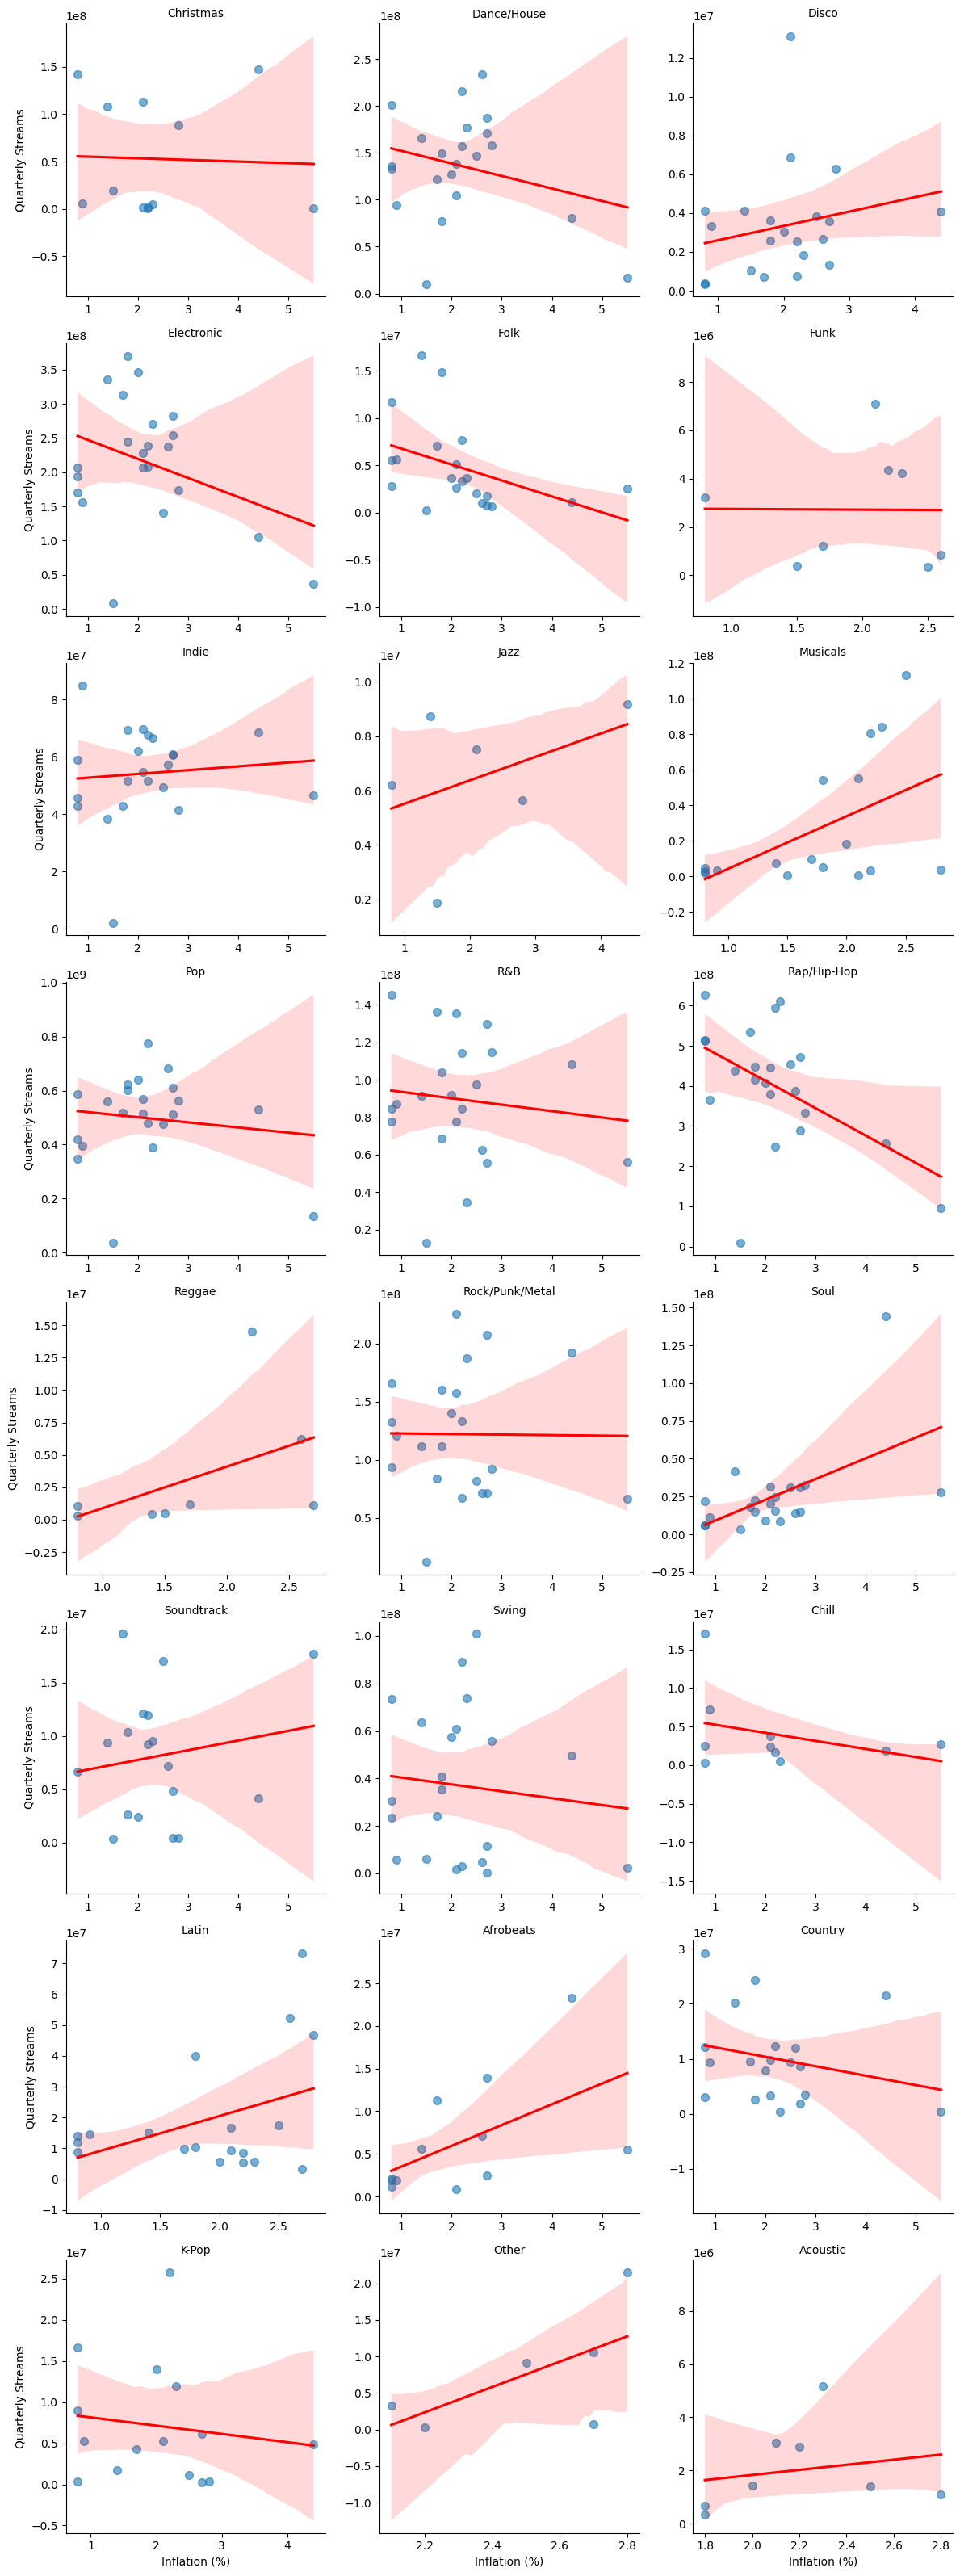

In [9]:
g = sns.FacetGrid(agg_df, col='genre_group', col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='inflation_(%)', y='streams', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color':'red'})

g.set_axis_labels("Inflation (%)", "Quarterly Streams")
g.set_titles("{col_name}")


plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

##### The scatter plots by genre group indicate no substantial association between inflation rates and Spotify streams. Regression lines across genres are largely flat and data points display high variability, suggesting inflation is not a key driver of streaming behaviour across genres during the study period.

##### Across most genre groups, the scatter plots suggest minimal to no relationship between quarterly inflation rates and Spotify streaming activity. Genre groups such as Pop and Rock display flat regression lines, indicating stability in streams regardless of inflation fluctuations. 

In [12]:
correlation = np.corrcoef(agg_df['inflation_(%)'], agg_df['streams'])[0, 1]
print(f'Correlation coefficient (r): {correlation:.3f}')

Correlation coefficient (r): -0.029


#### <u> Key findings: <u/>

##### Correlation coefficient (r): -0.029

##### As the -0.029 is close to 0, not close to 1 and negative - This means the relationship is very weak.
##### There is a very weak tendency for Quarterly Streams to decrease slightly as CPIH (%) increases, but it is not strong enough to say inflation and streams are tightly linked.
##### It is almost random but, with a small hint that higher inflation = fewer streams.

##### However, the relationship is not strong. The scatter of data points around the line shows a high degree of variability. This means that inflation alone does not predict Spotify streaming numbers.
##### Although there is a minor trend where higher inflation correlates with fewer streams, the weak correlation (r ≈ -0.029) suggests that other factors are likely to have a greater influence on streaming behaviour than inflation.
##### Therefore, while there might be some slight economic sensitivity in music streaming patterns, inflation is not a strong predictor of Spotify usage based on this model.

### <u> R² and MSE <u>

C:\Users\becca\AppData\Local\Temp\ipykernel_5192\266126999.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='R²', y='genre_group', palette='viridis')


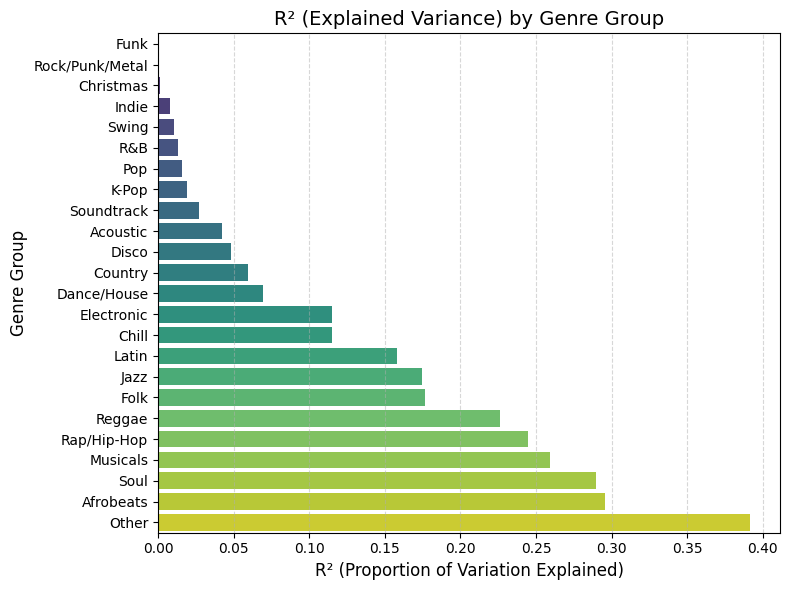

In [13]:
data = {
    'genre_group': [
        'Other', 'Afrobeats', 'Soul', 'Musicals', 'Rap/Hip-Hop', 'Reggae', 'Folk', 'Jazz', 'Latin',
        'Chill', 'Electronic', 'Dance/House', 'Country', 'Disco', 'Acoustic', 'Soundtrack',
        'K-Pop', 'Pop', 'R&B', 'Swing', 'Indie', 'Christmas', 'Rock/Punk/Metal', 'Funk'
    ],
    'R²': [
        0.391713, 0.295334, 0.289718, 0.258943, 0.244633, 0.225923, 0.176779, 0.174573, 0.157721,
        0.115057, 0.115001, 0.069608, 0.059487, 0.048412, 0.042564, 0.026871,
        0.018884, 0.016060, 0.013058, 0.010649, 0.008070, 0.001477, 0.000101, 0.000045
    ]
}

results_df = pd.DataFrame(data)

results_df = results_df.sort_values(by='R²', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=results_df, x='R²', y='genre_group', palette='viridis')

plt.title('R² (Explained Variance) by Genre Group', fontsize=14)
plt.xlabel('R² (Proportion of Variation Explained)', fontsize=12)
plt.ylabel('Genre Group', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Highest R² (~0.39 to 0.26)- Other (0.39), Afrobeats (0.29), Soul (0.29) and Musicals (0.26)
##### Moderate R² (0.17 to 0.11)-Rap/Hip-Hop (0.24), Reggae (0.22), Folk (0.17), Jazz (0.17), Latin (0.15), Chill (0.11) and Electronic (0.11)
##### Low to negligible R² (<0.10)- Dance/House, Country, Disco, Acoustic, Soundtrack, K-Pop, Pop, R&B, Swing, Indie, Christmas, Rock/Punk/Metal, Funk

##### Highest R²- For these genres, inflation explains 26–39% of the variation in streams. This is substantially higher than other genres.
##### Moderate R²- Some weak but noticeable relationship between inflation and streams. 


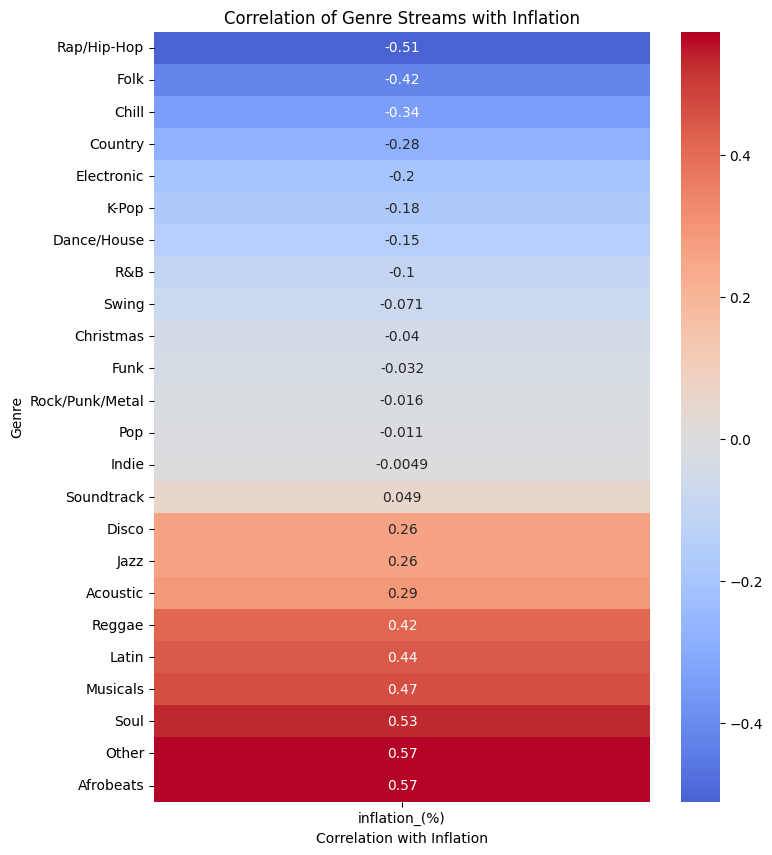

In [14]:
import seaborn as sns

pivot_df = agg_df.pivot_table(index='year_quarter', columns='genre_group', values='streams', aggfunc='sum')

inflation_df = agg_df[['year_quarter', 'inflation_(%)']].drop_duplicates()

merged_df = pivot_df.merge(inflation_df, on='year_quarter')

inflation_corr = merged_df.drop(columns=['year_quarter']).corr()[['inflation_(%)']].drop('inflation_(%)').sort_values(by='inflation_(%)')

plt.figure(figsize=(8, 10))
sns.heatmap(inflation_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Genre Streams with Inflation')
plt.xlabel('Correlation with Inflation')
plt.ylabel('Genre')
plt.show()

##### Strong Positive Correlation: A value close to +1 suggests that the relationship between the genre's streams and inflation is strongly positive.
##### Strong Negative Correlation: A value close to -1 suggests a strong negative relationship.
##### Weak/No Correlation: A value near 0 means there is little to no linear relationship between the two variables.

#### <u> Key findings: <u>

##### <u> Afrobeats (0.57): <u>
##### The genre shows a strong positive correlation with inflation (0.57), which means that as inflation increases, the streams for Afrobeats music increase as well. This is a high correlation, suggesting that the Afrobeats genre tends to perform better when inflation is higher.
##### During times of economic stress (e.g., higher inflation), people might turn to familiar, comforting music such as Afrobeats songs. This could be an emotional or psychological response where people gravitate toward music that they already know, as it provides a sense of familiarity and comfort during uncertain times.

##### <u>  Soul (0.53): <u>
##### The Soul genre shows a moderate positive correlation with inflation (0.53). This means that Soul music tends to perform better when inflation increases, though the relationship isn't as strong as Afrobeats music.

##### <u> Rap/Hip-Hop (-0.51):<u>
##### The Rap/Hip-Hop genre has a moderate negative correlation with inflation (-0.51) meaning that as inflation increases, the streaming volumes for this genre tend to decrease.
##### The negative correlation suggests that during inflationary periods, people may listen to less Rap/Hip-Hop music. This could be due to changing cultural or financial priorities during times of economic uncertainty. Perhaps, the genre's primary audience might cut back on non-essential spending (e.g., subscription services for music streaming) during inflationary times.
##### Alternatively, it could indicate that other genres (such as more comforting or emotional genres like Soul or Afrobreats) are preferred in response to financial stress.

##### <u> Indie (-0.0049):<u>

##### Indie has a very weak negative correlation with inflation (-0.0049). 
##### The correlation value being so close to zero suggests that inflation doesn't have much of an impact on the Indie genre. This weak negative correlation indicates that inflation may slightly reduce streaming, but the effect is almost negligible.
##### Indie could be more resistant to inflationary effects compared to other genres, possibly due to a loyal and dedicated fan base that listens to these genres regardless of economic conditions. These genres are typically driven by a strong cultural following and their audience may be less affected by financial pressures.

#### <u> Stacked Area Chart: Streaming Distribution Across Genres by Quarter <u>

<Figure size 1000x600 with 0 Axes>

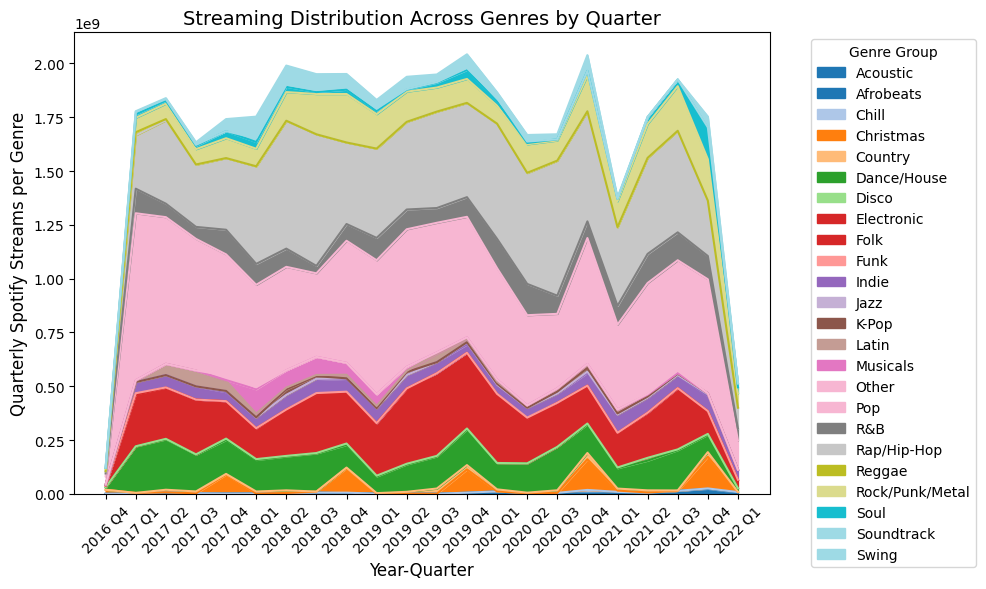

In [15]:
pivot_df = agg_df.pivot_table(index='year_quarter', columns='genre_group', values='streams', aggfunc='sum')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='area', stacked=True, figsize=(10, 6), cmap='tab20')

plt.title('Streaming Distribution Across Genres by Quarter', fontsize=14)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Quarterly Spotify Streams per Genre', fontsize=12)

plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index, rotation=45)

plt.legend(title='Genre Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

##### The stacked area chart visualises the distribution of Spotify streams across various genres over time, with the x-axis representing the year-quarter and the y-axis representing the quarterly Spotify streams per Genre. Each genre is represented as a coloured area, stacked on top of one another, showing how the contribution of each genre changes from quarter to quarter.

#### <u> Analysis: How Spotify Users’ Genre Preferences Vary with Inflation <u>

##### The grey area (likely Rap/Hip-Hip) and pink area (likely Pop) are consistently the largest contributors to total streams.
##### Pop and "Other" (a miscellaneous category) have the most significant share of streaming volume throughout the time period.

##### Genres like Electronic (red), Dance/House (green), and Rap/Hip-Hop (dark grey) have relatively consistent but smaller shares over time. These genres maintain a steady audience, contributing moderate but stable streams.

##### Genres like Acoustic, Afrobeats, Christmas, Reggae, Swing and Funk show minimal contributions to total streams. These are niche genres with limited but potentially loyal audiences.

##### Seasonality spikes- The orange spikes (likely Christmas) show clear seasonal increases, peaking around Q4 of each year. Expected rise in Christmas music streams in late-year quarters.

##### Overall total streams trend- The total height of the stack (overall streams) grew quickly in early quarters (2016–2017), plateaued slightly, and showed fluctuations (especially around 2020).
##### Possible COVID-19 pandemic impact visible around 2020 as there are dips and rebounds in streaming activity.